<a href="https://colab.research.google.com/github/Amrit9522/Personal_projects/blob/main/Internship%20task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amrit Dutta**

**THE SPARK FOUNDATION**

**TASK** **1**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# importing the dataset as a dataframe 
url="http://bit.ly/w-data"
data= pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

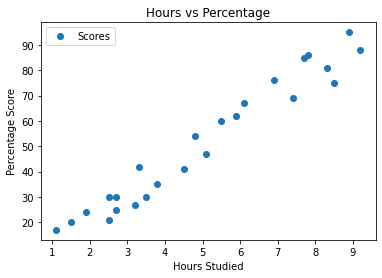

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above plot we can clearly see that there is a positive linear relationship between the variables hours studied and percentage of score**

**Preparing the Data**

Lets devide the data into attributes and levels

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now we will devide the data into train data and test data sets by using **scikitlearn** library

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

After spliting the data into training and testing datasets now the time is to train the algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("traing complete")

traing complete


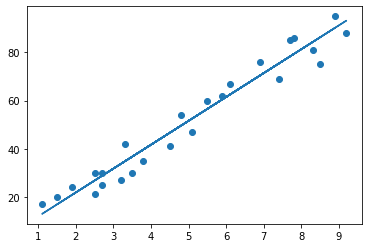

In [11]:
#plotting the regression line
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [12]:
print("accuracy of training learning rate",regressor.score(x_train,y_train)*100)
print("accuracy of testing learning rate",regressor.score(x_test,y_test)*100)

accuracy of training learning rate 95.15510725211553
accuracy of testing learning rate 94.54906892105353


After training the algorithm its time to make some prediction

In [13]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
#comparing the data actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


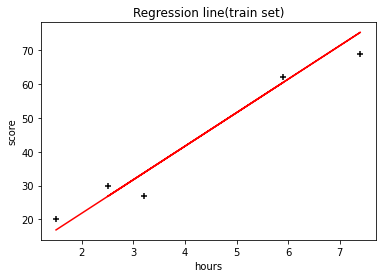

In [17]:
plt.plot(x_test,y_pred,color="Red")
plt.scatter(x_test,y_test,color="Black",marker="+")
plt.xlabel("hours")
plt.ylabel("score")
plt.title("Regression line(train set)")
plt.show()

In [19]:
#accuracy of the moddel
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105354

**Model Evaluation**

In [20]:
MSE= metrics.mean_squared_error(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("Mean squared error =", MSE)
print("Mean absolute error =", MAE)

Mean squared error = 21.598769307217456
Mean absolute error = 4.183859899002982


Lets have a look at our target value which is given

hour=9.25

In [22]:

own_pred = regressor.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 93.69173248737539


**Conclusion**
From above predicted score we can say if a student studied 9.25 hr per day then they will score 93.6917 marks